# CIFAR-10 dataset classification
## Net 1

The CIFAR-10 dataset consists of 60000 32x32 colour images in 10 classes, with 6000 images per class. There are 50000 training images and 10000 test images.

The dataset is divided into five training batches and one test batch, each with 10000 images. The test batch contains exactly 1000 randomly-selected images from each class. The training batches contain the remaining images in random order, but some training batches may contain more images from one class than another. Between them, the training batches contain exactly 5000 images from each class.

# Importing basic dependencies

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
# del model
import torch
import torch.nn as nn
import torch.optim as optim
from Utilities.model import Net1
from Utilities.utils import train, test
import torch.nn.functional as F
from torchsummary import summary

torch.manual_seed(1)

In [3]:
CLASSES = ("Airplane", "Automobile", "Bird", "Cat", "Deer", "Dog", "Frog", "Horse", "Ship", "Truck")

# Model Initialization & Summary

In [4]:
device = torch.device("mps")
model = Net1(dropout_percentage=0.02, norm="ln")
summary(model, input_size=(3, 32, 32))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 16, 32, 32]             448
         GroupNorm-2           [-1, 16, 32, 32]              32
              ReLU-3           [-1, 16, 32, 32]               0
           Dropout-4           [-1, 16, 32, 32]               0
            Conv2d-5           [-1, 32, 32, 32]           4,640
         GroupNorm-6           [-1, 32, 32, 32]              64
              ReLU-7           [-1, 32, 32, 32]               0
           Dropout-8           [-1, 32, 32, 32]               0
            Conv2d-9           [-1, 16, 32, 32]             528
        MaxPool2d-10           [-1, 16, 16, 16]               0
           Conv2d-11           [-1, 16, 16, 16]           2,320
        GroupNorm-12           [-1, 16, 16, 16]              32
             ReLU-13           [-1, 16, 16, 16]               0
          Dropout-14           [-1, 16,

# Dataset & Dataloaders

In [5]:
from Utilities.transforms import train_transforms, test_transforms

In [6]:
from Utilities.dataset import get_dataloaders

batch_size = 64

kwargs = {'batch_size': batch_size, 'shuffle': True, 'num_workers': 4, 'pin_memory': True}
train_loader, test_loader = get_dataloaders(train_transforms=train_transforms, test_transforms=test_transforms, **kwargs)

Files already downloaded and verified
Files already downloaded and verified


# Data Exploration

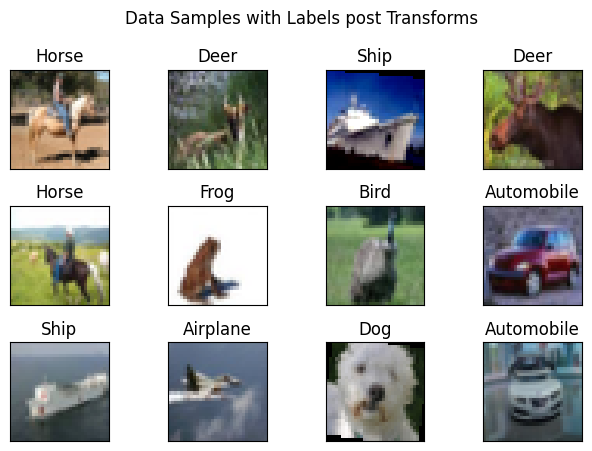

In [7]:
from Utilities.visualize import plot_data_samples, plot_class_label_counts

# plot_class_label_counts(train_loader, classes=CLASSES)
plot_data_samples(train_loader, classes=CLASSES)

# Training

In [8]:
model = Net1(dropout_percentage=0.0, norm="ln").to(device)
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9)
scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=7, gamma=0.1, verbose=True)

criterion = F.nll_loss
num_epochs = 20

for epoch in range(1, num_epochs+1):
  print(f'Epoch {epoch}')
  train_accs, train_losses = train(model, device, train_loader, optimizer, criterion)
  test_accs, test_losses = test(model, device, test_loader, criterion)
  scheduler.step()

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 1
Train: 100% Loss=1.4343 Batch_id=781 Accuracy=26.51
Test set: Average loss: 1.6227, Accuracy: 4016/10000 (40.16%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 2
Train: 100% Loss=1.8432 Batch_id=781 Accuracy=42.43
Test set: Average loss: 1.3672, Accuracy: 4948/10000 (49.48%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 3
Train: 100% Loss=0.7174 Batch_id=781 Accuracy=50.71
Test set: Average loss: 1.3305, Accuracy: 5159/10000 (51.59%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 4
Train: 100% Loss=1.0762 Batch_id=781 Accuracy=55.87
Test set: Average loss: 1.1136, Accuracy: 5958/10000 (59.58%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 5
Train: 100% Loss=0.8570 Batch_id=781 Accuracy=59.49
Test set: Average loss: 1.0504, Accuracy: 6242/10000 (62.42%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 6
Train: 100% Loss=1.2211 Batch_id=781 Accuracy=62.02
Test set: Average loss: 1

In [13]:
import pandas as pd
ln_df = pd.DataFrame({'Train Acc': train_accs, 'Test Acc': test_accs, 'Train Loss': train_losses, 'Test Loss': test_losses})
ln_df.to_csv('Store/LN_training.csv', index=False)

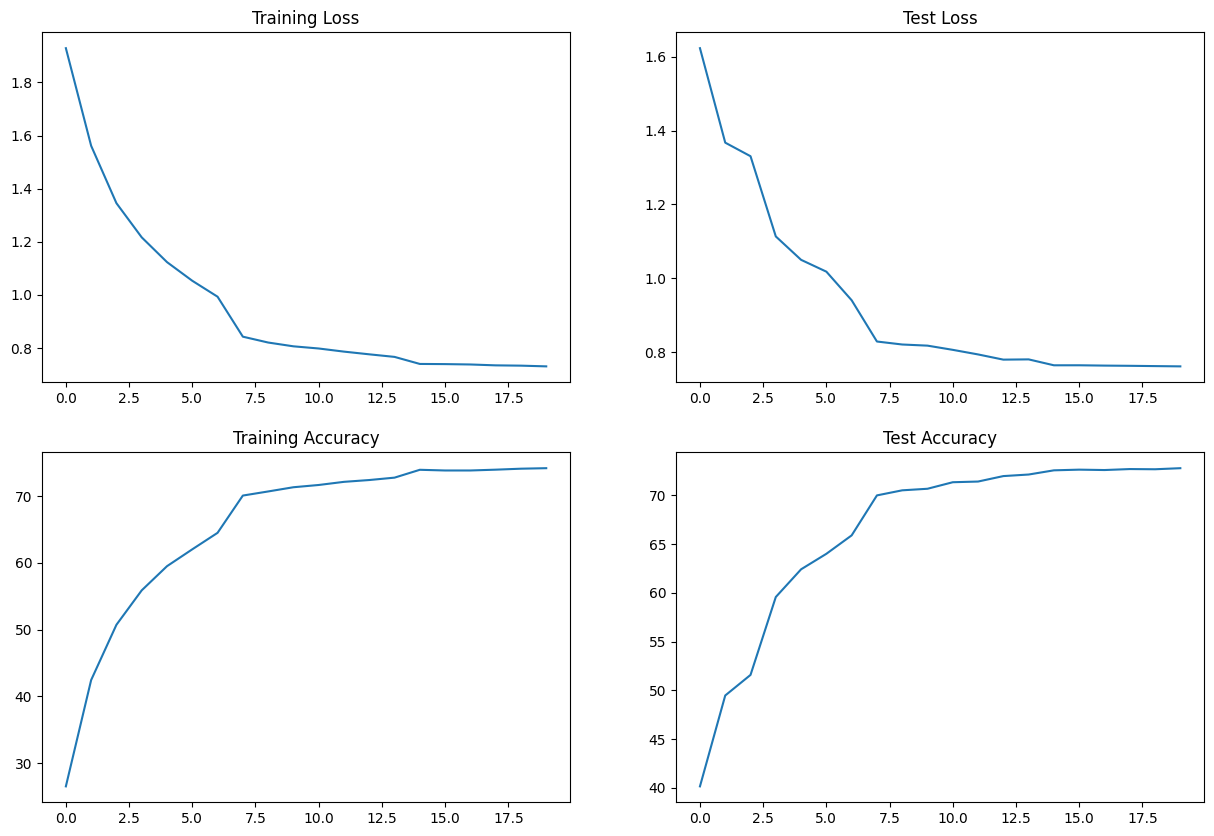

In [14]:
from Utilities.visualize import plot_model_training_curves

plot_model_training_curves(train_accs=train_accs, test_accs=test_accs, train_losses=train_losses, test_losses=test_losses)

# Model Analysis

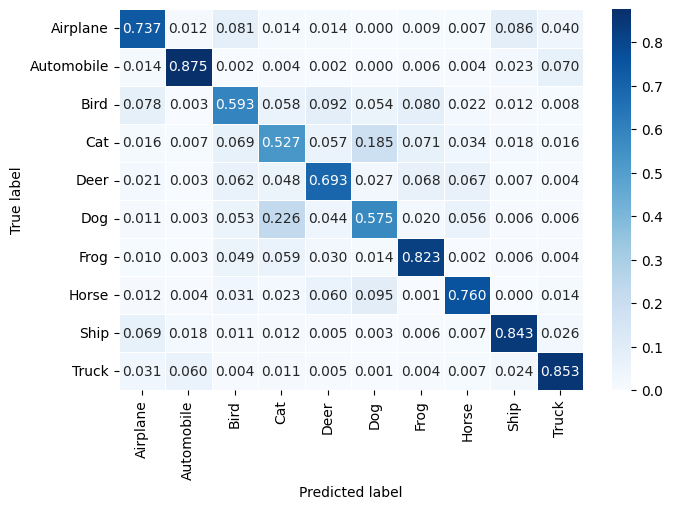

In [15]:
from Utilities.utils import get_all_and_incorrect_preds
from Utilities.visualize import plot_confusion_matrix

all_preds, all_labels, incorrect = get_all_and_incorrect_preds(model=model, loader=test_loader, device=device)
plot_confusion_matrix(all_labels, all_preds, classes=CLASSES)

Total Incorrect Predictions 2721


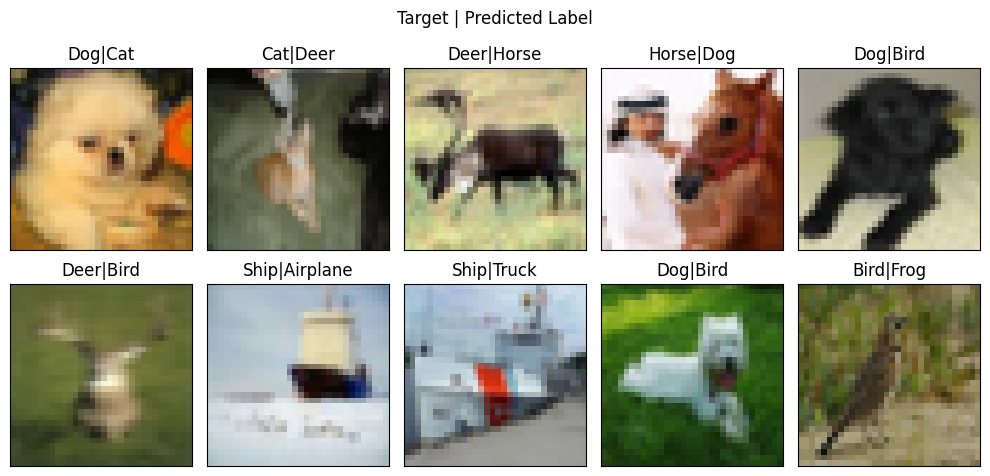

In [16]:
from Utilities.visualize import plot_incorrect_preds

plot_incorrect_preds(incorrect, classes=CLASSES)